In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

!mkdir DATA

In [ ]:
# a nonlinear function of a 2d array x
def f(x,c=1):
    r=0
    if c==1:
        if x[0]>-20 and x[1]>-40 and x[0]+x[1] < 40:
            r=1
    if c==2:
        if (np.sign(x.sum())*np.sign(x[0]))*np.cos(np.linalg.norm(x)/(2*np.pi))>0:
            r=1
    return r


def filename(s,change):
    return "./DATA/"+s+"-for-DNN-"+change+".dat"


In [ ]:
#GENERAL FUNCTION FOR GENERATING AND SPLITTING DATA (change_amount = 0 => 'default', change_amount < 0 => 'reduced', change_amount > 0 => 'increased')

def generate_and_split_data(change='default', change_amount=0, N=4000, L=2, B=100, TYPE=1, perc_train=0.8):
    
    N += change_amount
    print("current number of samples: ", N)

    #setting the random seed for reproducibility:
    np.random.seed(12345) 
    
    #generating data: N samples of dimention L in the x array, N zeroes in the y array
    x,y = (np.random.random((N,L))-0.5)*B, np.zeros(N) 
    #(x array: first we generate 4000 2d samples with values between 0 and 1, then we subtract 0.5 and multiply by 100
    #obtaining uniform random 2d coordinates betweeen -50 and 50)
    
    #labelling data according to a nonlinear function "f"
    for i in range(N):
        y[i] = f(x[i],TYPE) 
    
    #plotting for better clarity:
    plt.figure(figsize = (8,8))
    plt.scatter(x[:,0],x[:,1],c=y)
    plt.show
    
    #splitting sets:
    N_train = int(perc_train*N)
    x_train, y_train = x[0:N_train], y[0:N_train]
    x_valid, y_valid = x[N_train:],y[N_train:]

    return x,y,x_train, y_train, x_valid, y_valid 

In [ ]:
# TRAINING AND SCREENING

def train(x_train, y_train, x_valid, y_valid, L=2, nepoch=400, batch_size=50, loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']):

    print("Training set size:", len(x_train)," Validation set size:", len(x_valid))

    #Rescaling input data:
    def Rescale(x):
        return x/np.max(x) #uniform rescaling
    x_train = Rescale(x_train)
    x_valid = Rescale(x_valid)

    #setting random seed for reproducibility:
    np.random.seed(12345)

    #creating the model:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dense(20,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))

    model.compile(optimizer, loss, metrics)
    fit = model.fit(x_train, y_train, epochs = nepoch, batch_size = batch_size, validation_data = (x_valid,y_valid), verbose=2)
    return model,fit

current number of samples:  1500


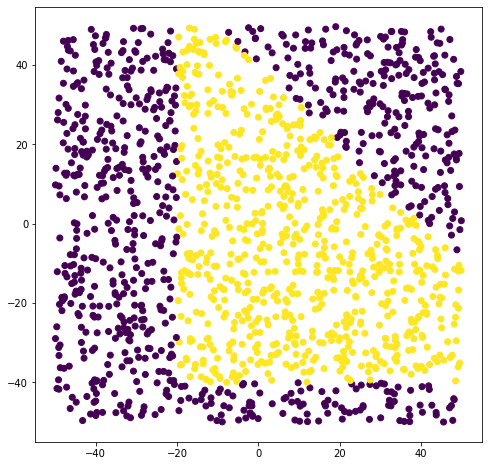

In [ ]:
change = 'reduced'
change_amount = -2500

x,y,x_train_red, y_train_red, x_valid_red, y_valid_red = generate_and_split_data(change,change_amount)

In [ ]:
model_reduced,fit_reduced = train(x_train_red, y_train_red, x_valid_red, y_valid_red)

Training set size: 1200  Validation set size: 300
Epoch 1/400
24/24 - 5s - loss: 0.7129 - accuracy: 0.3875 - val_loss: 0.6962 - val_accuracy: 0.4200 - 5s/epoch - 223ms/step
Epoch 2/400
24/24 - 0s - loss: 0.6891 - accuracy: 0.4858 - val_loss: 0.6829 - val_accuracy: 0.5233 - 165ms/epoch - 7ms/step
Epoch 3/400
24/24 - 0s - loss: 0.6770 - accuracy: 0.5275 - val_loss: 0.6755 - val_accuracy: 0.5233 - 208ms/epoch - 9ms/step
Epoch 4/400
24/24 - 0s - loss: 0.6677 - accuracy: 0.5600 - val_loss: 0.6672 - val_accuracy: 0.5233 - 110ms/epoch - 5ms/step
Epoch 5/400
24/24 - 0s - loss: 0.6534 - accuracy: 0.6017 - val_loss: 0.6542 - val_accuracy: 0.6233 - 163ms/epoch - 7ms/step
Epoch 6/400
24/24 - 0s - loss: 0.6369 - accuracy: 0.6450 - val_loss: 0.6411 - val_accuracy: 0.6433 - 117ms/epoch - 5ms/step
Epoch 7/400
24/24 - 0s - loss: 0.6195 - accuracy: 0.6825 - val_loss: 0.6283 - val_accuracy: 0.6567 - 192ms/epoch - 8ms/step
Epoch 8/400
24/24 - 0s - loss: 0.6018 - accuracy: 0.6925 - val_loss: 0.6151 - val_a

In [ ]:
display(fit_reduced.history['accuracy'][-1], )

0.9258333444595337

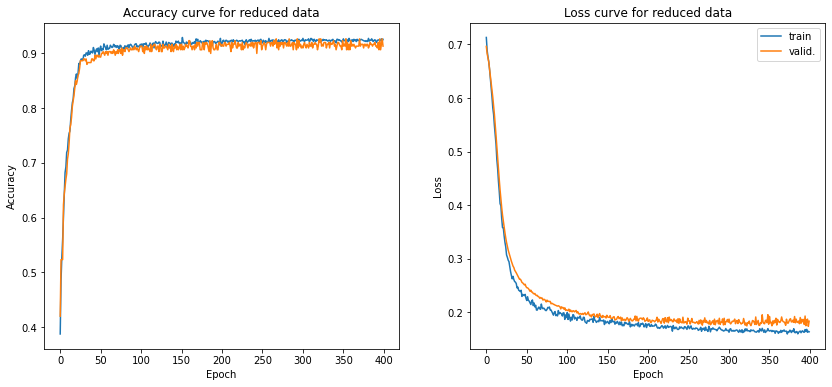

In [ ]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit_reduced.history['accuracy'],label="train")
ax.plot(fit_reduced.history['val_accuracy'],label="valid.")
ax.set_xlabel('Epoch')
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy curve for reduced data")
ax=AX[1]
ax.plot(fit_reduced.history['loss'],label="train")
ax.plot(fit_reduced.history['val_loss'],label="valid.")
ax.set_xlabel('Epoch')
ax.set_ylabel("Loss")
ax.set_title("Loss curve for reduced data")
ax.legend()

In [ ]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model_reduced.predict(grid_r)

51 2601
[50. 50.]


<function matplotlib.pyplot.show>

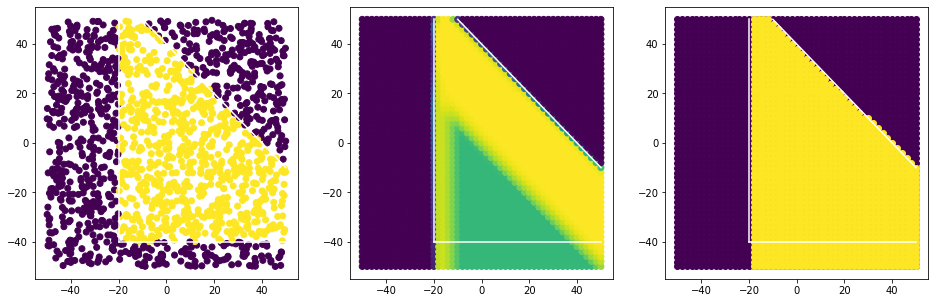

In [ ]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show

current number of samples:  8000


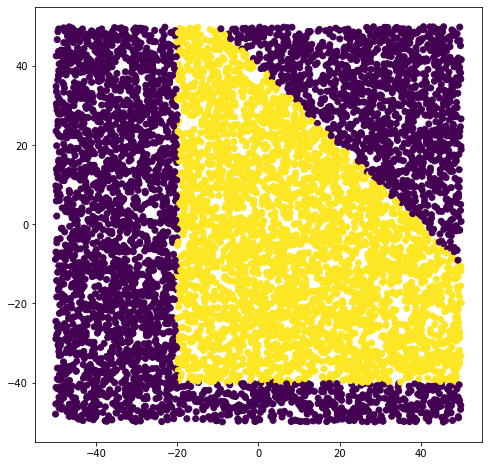

In [ ]:
change = 'increased'
change_amount = 4000

x,y,x_train_inc, y_train_inc, x_valid_inc, y_valid_inc = generate_and_split_data(change,change_amount)

In [ ]:
model_increased,fit_increased = train(x_train_inc, y_train_inc, x_valid_inc, y_valid_inc)

Training set size: 6400  Validation set size: 1600
Epoch 1/400
128/128 - 1s - loss: 0.6694 - accuracy: 0.5573 - val_loss: 0.6443 - val_accuracy: 0.6081 - 926ms/epoch - 7ms/step
Epoch 2/400
128/128 - 0s - loss: 0.6406 - accuracy: 0.6186 - val_loss: 0.6267 - val_accuracy: 0.6394 - 299ms/epoch - 2ms/step
Epoch 3/400
128/128 - 0s - loss: 0.6260 - accuracy: 0.6450 - val_loss: 0.5969 - val_accuracy: 0.6875 - 315ms/epoch - 2ms/step
Epoch 4/400
128/128 - 0s - loss: 0.5689 - accuracy: 0.7170 - val_loss: 0.4769 - val_accuracy: 0.8062 - 315ms/epoch - 2ms/step
Epoch 5/400
128/128 - 0s - loss: 0.4250 - accuracy: 0.8350 - val_loss: 0.3140 - val_accuracy: 0.9200 - 320ms/epoch - 2ms/step
Epoch 6/400
128/128 - 0s - loss: 0.3190 - accuracy: 0.8973 - val_loss: 0.2454 - val_accuracy: 0.9362 - 305ms/epoch - 2ms/step
Epoch 7/400
128/128 - 0s - loss: 0.2852 - accuracy: 0.9080 - val_loss: 0.2270 - val_accuracy: 0.9431 - 296ms/epoch - 2ms/step
Epoch 8/400
128/128 - 0s - loss: 0.2689 - accuracy: 0.9141 - val_lo

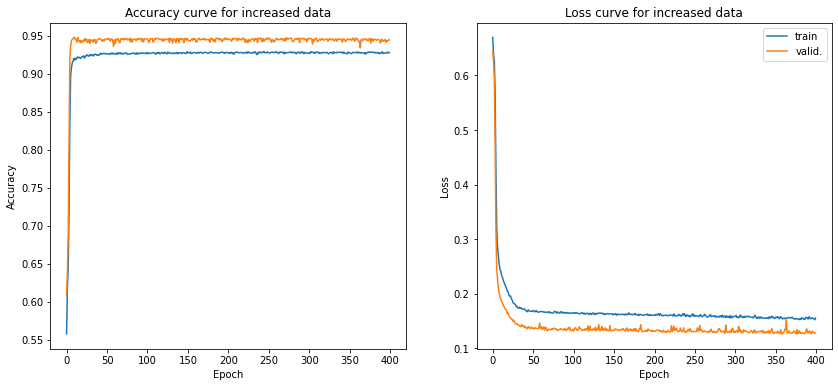

In [ ]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit_increased.history['accuracy'],label="train")
ax.plot(fit_increased.history['val_accuracy'],label="valid.")
ax.set_xlabel('Epoch')
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy curve for increased data")
ax=AX[1]
ax.plot(fit_increased.history['loss'],label="train")
ax.plot(fit_increased.history['val_loss'],label="valid.")
ax.set_xlabel('Epoch')
ax.set_ylabel("Loss")
ax.set_title("Loss curve for increased data")
ax.legend()

In [ ]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model_increased.predict(grid_r)

51 2601
[50. 50.]


<function matplotlib.pyplot.show>

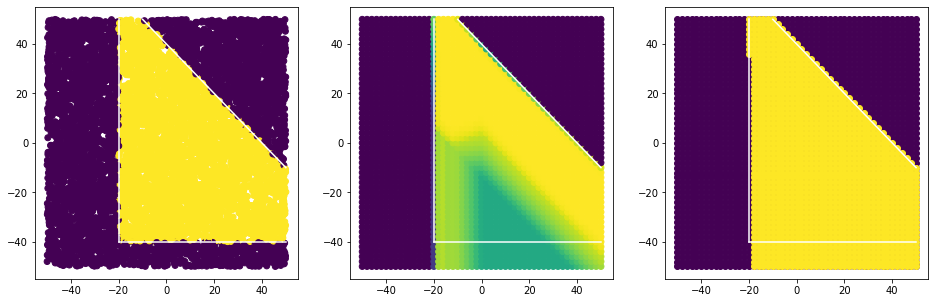

In [ ]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show

current number of samples:  4000


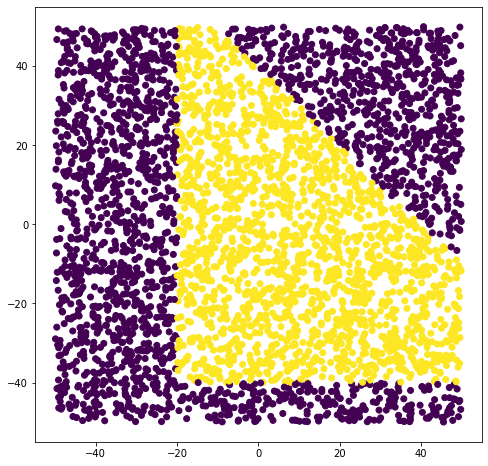

In [ ]:
change = 'default'
change_amount = 0

x,y,x_train_def, y_train_def, x_valid_def, y_valid_def  = generate_and_split_data(change,change_amount)

In [ ]:
model_default,fit_default = train(x_train_def, y_train_def, x_valid_def, y_valid_def)

Training set size: 3200  Validation set size: 800
Epoch 1/400
64/64 - 1s - loss: 0.6709 - accuracy: 0.5403 - val_loss: 0.6294 - val_accuracy: 0.5888 - 623ms/epoch - 10ms/step
Epoch 2/400
64/64 - 0s - loss: 0.5992 - accuracy: 0.6672 - val_loss: 0.5533 - val_accuracy: 0.7350 - 195ms/epoch - 3ms/step
Epoch 3/400
64/64 - 0s - loss: 0.5167 - accuracy: 0.7788 - val_loss: 0.4721 - val_accuracy: 0.8250 - 200ms/epoch - 3ms/step
Epoch 4/400
64/64 - 0s - loss: 0.4398 - accuracy: 0.8462 - val_loss: 0.4048 - val_accuracy: 0.8388 - 193ms/epoch - 3ms/step
Epoch 5/400
64/64 - 0s - loss: 0.3819 - accuracy: 0.8669 - val_loss: 0.3523 - val_accuracy: 0.8737 - 154ms/epoch - 2ms/step
Epoch 6/400
64/64 - 0s - loss: 0.3432 - accuracy: 0.8847 - val_loss: 0.3186 - val_accuracy: 0.8988 - 165ms/epoch - 3ms/step
Epoch 7/400
64/64 - 0s - loss: 0.3133 - accuracy: 0.8909 - val_loss: 0.2965 - val_accuracy: 0.8963 - 192ms/epoch - 3ms/step
Epoch 8/400
64/64 - 0s - loss: 0.3003 - accuracy: 0.9003 - val_loss: 0.2817 - val

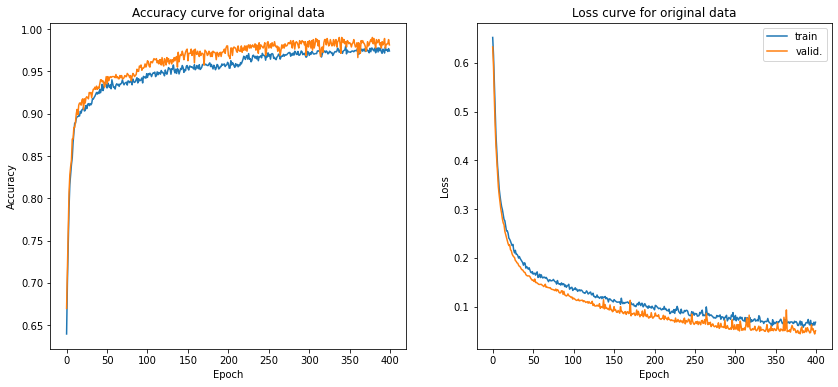

In [ ]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit_default.history['accuracy'],label="train")
ax.plot(fit_default.history['val_accuracy'],label="valid.")
ax.set_xlabel('Epoch')
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy curve for original data")
ax=AX[1]
ax.plot(fit_default.history['loss'],label="train")
ax.plot(fit_default.history['val_loss'],label="valid.")
ax.set_xlabel('Epoch')
ax.set_ylabel("Loss")
ax.set_title("Loss curve for original data")
ax.legend()

In [ ]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model_default.predict(grid_r)

51 2601
[50. 50.]


<function matplotlib.pyplot.show>

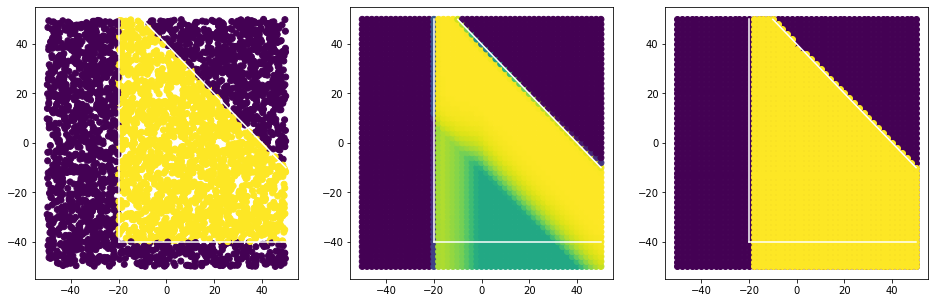

In [ ]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x[:,0],x[:,1],c=y)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show

In [ ]:
#AUGMENTATION
def augment_data(x_train, y_train, M=3200, L=2, TYPE=1, N=4000):
  x_temp, y_temp = np.zeros((M,L)), np.zeros(M)
  x_train_copy = np.copy(x_train) #to be sure not to modify the training set
  y_train_copy = np.copy(y_train)
  for i in range(M):
    max = np.max(x_train)
    #small random shift = a random number (from uniform distribution) between -max/N and max/N (es. from -50/4000= -0.0125 to 50/4000=0.0125) 
    x_temp[i][0] = x_train_copy[i][0] + np.random.randint((-max/(N))*100,(max/(N))*100)/100
    x_temp[i][1] = x_train_copy[i][1] + np.random.randint((-max/(N))*100,(max/(N))*100)/100
    #only for checking purposes:
    y_temp[i] = f(x_temp[i],TYPE)
  
  check = (np.all(y_train[:1000] == y_temp[:1000]), 1000 - np.count_nonzero(y_train[:1000] == y_temp[:1000]))
  print("Wrongly labelled augmented samples: ", check)
  x_augm = np.concatenate((x_train, x_temp[:1000]), axis=0)
  y_augm = np.concatenate((y_train, y_train_copy[:1000]), axis=0)
  return x_augm, y_augm

In [ ]:
x_train_augm, y_train_augm = augment_data(x_train_def, y_train_def)

Wrongly labelled augmented samples:  (False, 1)


In [ ]:
def wrongly_labelled_augmented_samples_mean(x_train, y_train, M=3200, L=2, TYPE=1, N=4000, augmentations_nb = 3000):
  x_temp, y_temp = np.zeros((M,L)), np.zeros(M)
  x_train_copy = np.copy(x_train) #to be sure not to modify the training set
  y_train_copy = np.copy(y_train)
  checks_array = np.zeros(augmentations_nb)
  for j in range(augmentations_nb):
    max = np.max(x_train)
    for i in range(M):
      #small random shift = a random number (from uniform distribution) between -max/N and max/N (here 99/4000 = 0.0125) 
      x_temp[i][0] = x_train_copy[i][0] + np.random.randint((-max/(N))*100,(max/(N))*100)/100
      x_temp[i][1] = x_train_copy[i][1] + np.random.randint((-max/(N))*100,(max/(N))*100)/100
      #only for checking purposes:
      y_temp[i] = f(x_temp[i],TYPE)
    check = 1000 - np.count_nonzero(y_train[:1000] == y_temp[:1000])
    checks_array[j] = check
  plt.hist(checks_array)
  plt.show()
  return np.mean(checks_array)

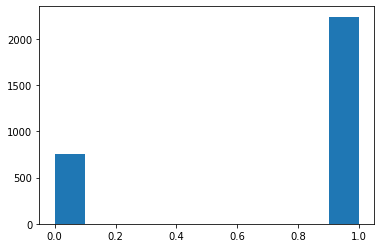

0.7476666666666667

In [ ]:
wrongly_labelled_augmented_samples_mean(x_train_def, y_train_def)

In [ ]:
model_augmented,fit_augmented = train(x_train_augm, y_train_augm, x_valid_def, y_valid_def)

Training set size: 4200  Validation set size: 800
Epoch 1/400
84/84 - 1s - loss: 0.6797 - accuracy: 0.6264 - val_loss: 0.6774 - val_accuracy: 0.6375 - 675ms/epoch - 8ms/step
Epoch 2/400
84/84 - 0s - loss: 0.6569 - accuracy: 0.6674 - val_loss: 0.6463 - val_accuracy: 0.6750 - 185ms/epoch - 2ms/step
Epoch 3/400
84/84 - 0s - loss: 0.6245 - accuracy: 0.6812 - val_loss: 0.6138 - val_accuracy: 0.6687 - 194ms/epoch - 2ms/step
Epoch 4/400
84/84 - 0s - loss: 0.5976 - accuracy: 0.6964 - val_loss: 0.5870 - val_accuracy: 0.6825 - 191ms/epoch - 2ms/step
Epoch 5/400
84/84 - 0s - loss: 0.5701 - accuracy: 0.7067 - val_loss: 0.5603 - val_accuracy: 0.6975 - 200ms/epoch - 2ms/step
Epoch 6/400
84/84 - 0s - loss: 0.5470 - accuracy: 0.7224 - val_loss: 0.5288 - val_accuracy: 0.7312 - 191ms/epoch - 2ms/step
Epoch 7/400
84/84 - 0s - loss: 0.5204 - accuracy: 0.7474 - val_loss: 0.4945 - val_accuracy: 0.7663 - 192ms/epoch - 2ms/step
Epoch 8/400
84/84 - 0s - loss: 0.4879 - accuracy: 0.7762 - val_loss: 0.4527 - val_

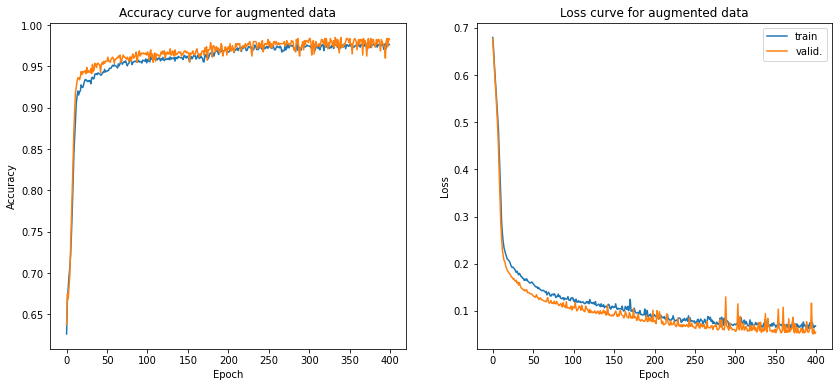

In [ ]:
fig,AX=plt.subplots(1,2,figsize=(14,6.))
ax=AX[0]
ax.plot(fit_augmented.history['accuracy'],label="train")
ax.plot(fit_augmented.history['val_accuracy'],label="valid.")
ax.set_xlabel('Epoch')
ax.set_ylabel("Accuracy")
ax.set_title("Accuracy curve for augmented data")
ax=AX[1]
ax.plot(fit_augmented.history['loss'],label="train")
ax.plot(fit_augmented.history['val_loss'],label="valid.")
ax.set_xlabel('Epoch')
ax.set_ylabel("Loss")
ax.set_title("Loss curve for augmented data")
ax.legend()

In [ ]:
dX = 2
X1 = np.arange(-50,50+dX, dX)
LG = len(X1)
grid = np.zeros((LG*LG,2))
k=0
for i in range(LG):
    for j in range(LG):
        grid[k,:]=(X1[j],X1[i])
        k=k+1
print(len(X1),len(grid))
print(grid[-1])

# RESCALE

grid_r = grid/50

pred = model_augmented.predict(grid_r)

51 2601
[50. 50.]


<function matplotlib.pyplot.show>

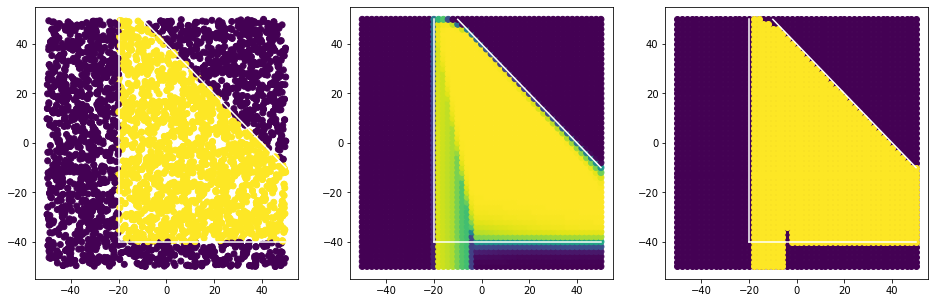

In [ ]:
def boundaries():    
    ax.plot((-20,-20),(-40,50),c="w")
    ax.plot((-20,50),(-40,-40),c="w")
    ax.plot((-10,50),(50,-10),c="w")
fig,AX=plt.subplots(1,3,figsize=(16,5.))
ax=AX[0]
ax.scatter(x_train_augm[:,0],x_train_augm[:,1],c=y_train_augm)
boundaries()
ax=AX[1]
ax.scatter(grid[:,0],grid[:,1],c=pred)
boundaries()
ax=AX[2]
W1=np.where(pred>0.5)[0] 
ax.scatter(grid[:,0],grid[:,1],c="#440154")
ax.scatter(grid[W1,0],grid[W1,1],c="#fde725")
boundaries()
plt.show
plt.show

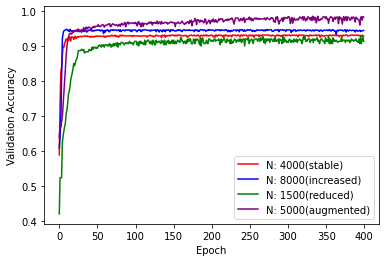

In [ ]:
import matplotlib.pyplot as plt

plt.plot(fit_default.history['val_accuracy'],label="N: 4000(stable)",color='red')
plt.plot(fit_increased.history['val_accuracy'],label="N: 8000(increased)",color='blue')
plt.plot(fit_reduced.history['val_accuracy'],label="N: 1500(reduced)",color='green')
plt.plot(fit_augmented.history['val_accuracy'],label="N: 5000(augmented)",color='purple')

plt.xlabel('Epoch')
plt.ylabel("Validation Accuracy")
plt.legend()

# WE NEED TO ADD HERE AUGMENTATION PART

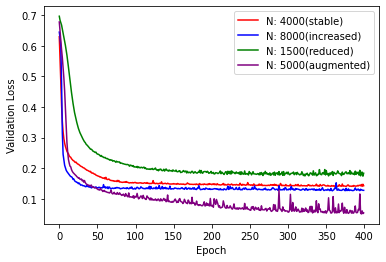

In [ ]:
plt.plot(fit_default.history['val_loss'],label="N: 4000(stable)",color='red')
plt.plot(fit_increased.history['val_loss'],label="N: 8000(increased)",color='blue')
plt.plot(fit_reduced.history['val_loss'],label="N: 1500(reduced)",color='green')
plt.plot(fit_augmented.history['val_loss'],label="N: 5000(augmented)",color='purple')

plt.xlabel('Epoch')
plt.ylabel("Validation Loss")
plt.legend()

current number of samples:  4000


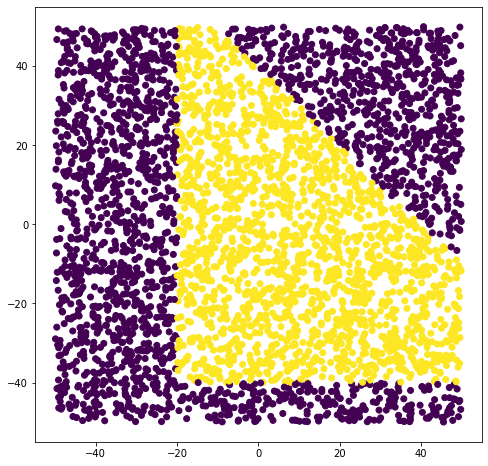

In [ ]:
#IMPLEMENTING GRID SEARCH WITH THE STABLE SITUATION

change = 'stable'
change_amount = 0

x,y,x_train, y_train, x_valid, y_valid = generate_and_split_data(change,change_amount)

In [ ]:
from keras.constraints import maxnorm

def train_grid(x_train, y_train,x_valid, y_valid):

    print("Train:", len(x_train)," Validation", len(x_valid))
    L=2
    #Rescale input data
    def Rescale(x):
        return x/np.max(x)

    x_train = Rescale(x_train)
    x_valid = Rescale(x_valid)

    #reproducibility
    np.random.seed(12345)
  
    def build_classifier(dropout_rate=0.0,optimizer = 'adam',activation='sigmoid',init_mode='normal',hidden_units=20):
        
        model = Sequential()
        model.add(Dense(L,input_shape=(L,),activation=activation))
        model.add(Dense(hidden_units,activation=activation))
        model.add(Dense(hidden_units,activation=activation))
        model.add(Dropout(dropout_rate))
        model.add(Dense(1,activation='sigmoid'))
       
        # call scikit grid search module
        model.compile(loss='binary_crossentropy',  optimizer= optimizer, metrics=['accuracy'])

        return model
    
    optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax']
    activation = ['softmax', 'relu', 'tanh', 'sigmoid', 'linear']
    dropout_rate = [0.0, 0.1,0.3,0.5]
    hidden_units=[20,25,20]

    param_grid = dict(optimizer=optimizer,activation=activation,dropout_rate=dropout_rate,hidden_units=hidden_units)

    
    # call Keras scikit wrapper
    model_gridsearch = KerasClassifier(build_fn=build_classifier, 
                        epochs=10,  
                        verbose=1)
    
    grid = GridSearchCV(estimator=model_gridsearch, param_grid=param_grid, n_jobs=1, cv=4)
    grid_result = grid.fit(x_train,y_train)
    
    # summarize results
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))
    return grid_result

In [ ]:
grid_result=train_grid(x_train, y_train,x_valid, y_valid)

Train: 3200  Validation 800
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


Streaming output truncated to the last 5000 lines.
75/75 [==============================] - 1s 5ms/step - loss: 0.6542 - accuracy: 0.5783
Epoch 2/10
75/75 [==============================] - 0s 4ms/step - loss: 0.6289 - accuracy: 0.6187
Epoch 3/10
75/75 [==============================] - 0s 4ms/step - loss: 0.6279 - accuracy: 0.6229
Epoch 4/10
75/75 [==============================] - 0s 4ms/step - loss: 0.6279 - accuracy: 0.6313
Epoch 5/10
75/75 [==============================] - 0s 5ms/step - loss: 0.6279 - accuracy: 0.6158
Epoch 6/10
75/75 [==============================] - 0s 4ms/step - loss: 0.6276 - accuracy: 0.6221
Epoch 7/10
75/75 [==============================] - 0s 5ms/step - loss: 0.6277 - accuracy: 0.6275
Epoch 8/10
75/75 [==============================] - 0s 4ms/step - loss: 0.6281 - accuracy: 0.6196
Epoch 9/10
75/75 [==============================] - 0s 5ms/step - loss: 0.6278 - accuracy: 0.6179
Epoch 10/10
25/25 [==============================] - 0s 4ms/step - loss: 0.628

In [ ]:
import pandas as pd
all_scores = pd.DataFrame(grid_result.cv_results_)

In [ ]:
all_scores.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_dropout_rate,param_hidden_units,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,5.085509,1.014219,0.288891,0.034010,softmax,0.0,20,SGD,"{'activation': 'softmax', 'dropout_rate': 0.0,...",0.55,0.49625,0.53,0.5725,0.537187,0.028012,205
1,5.186404,0.798551,0.321744,0.033405,softmax,0.0,20,RMSprop,"{'activation': 'softmax', 'dropout_rate': 0.0,...",0.55,0.49625,0.53,0.5725,0.537187,0.028012,205
2,4.803221,0.945969,0.359300,0.124096,softmax,0.0,20,Adagrad,"{'activation': 'softmax', 'dropout_rate': 0.0,...",0.55,0.50375,0.53,0.4275,0.502813,0.046472,320
3,4.668750,1.063639,0.323190,0.006167,softmax,0.0,20,Adadelta,"{'activation': 'softmax', 'dropout_rate': 0.0,...",0.55,0.49625,0.53,0.4275,0.500937,0.046548,324
4,5.340525,0.728872,0.307804,0.018002,softmax,0.0,20,Adam,"{'activation': 'softmax', 'dropout_rate': 0.0,...",0.55,0.49625,0.53,0.5925,0.542187,0.034825,194


In [ ]:
all_scores.sort_values(by=['rank_test_score'],inplace=True)

In [ ]:
#@title Default title text
all_scores.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_dropout_rate,param_hidden_units,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
100,4.467516,0.252789,0.381764,0.012282,relu,0.1,25,Adam,"{'activation': 'relu', 'dropout_rate': 0.1, 'h...",0.89250,0.91875,0.84250,0.8800,0.883437,0.027463,1
118,4.732072,0.703531,0.369440,0.034065,relu,0.3,25,Adam,"{'activation': 'relu', 'dropout_rate': 0.3, 'h...",0.91375,0.89000,0.82500,0.8925,0.880312,0.033241,2
142,5.091719,0.724923,0.320300,0.052070,relu,0.5,20,Adam,"{'activation': 'relu', 'dropout_rate': 0.5, 'h...",0.87750,0.92375,0.81875,0.8875,0.876875,0.037713,3
124,5.370564,0.765984,0.319898,0.034912,relu,0.3,20,Adam,"{'activation': 'relu', 'dropout_rate': 0.3, 'h...",0.89375,0.84125,0.91875,0.8250,0.869687,0.038052,4
103,5.478513,0.399400,0.373402,0.042247,relu,0.1,20,RMSprop,"{'activation': 'relu', 'dropout_rate': 0.1, 'h...",0.82625,0.89375,0.85125,0.8900,0.865313,0.028026,5


In [ ]:
all_scores.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_dropout_rate,param_hidden_units,param_optimizer,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
100,4.467516,0.252789,0.381764,0.012282,relu,0.1,25,Adam,"{'activation': 'relu', 'dropout_rate': 0.1, 'h...",0.89250,0.91875,0.84250,0.88000,0.883437,0.027463,1
118,4.732072,0.703531,0.369440,0.034065,relu,0.3,25,Adam,"{'activation': 'relu', 'dropout_rate': 0.3, 'h...",0.91375,0.89000,0.82500,0.89250,0.880312,0.033241,2
142,5.091719,0.724923,0.320300,0.052070,relu,0.5,20,Adam,"{'activation': 'relu', 'dropout_rate': 0.5, 'h...",0.87750,0.92375,0.81875,0.88750,0.876875,0.037713,3
124,5.370564,0.765984,0.319898,0.034912,relu,0.3,20,Adam,"{'activation': 'relu', 'dropout_rate': 0.3, 'h...",0.89375,0.84125,0.91875,0.82500,0.869687,0.038052,4
103,5.478513,0.399400,0.373402,0.042247,relu,0.1,20,RMSprop,"{'activation': 'relu', 'dropout_rate': 0.1, 'h...",0.82625,0.89375,0.85125,0.89000,0.865313,0.028026,5
121,5.439094,0.559883,0.345562,0.050802,relu,0.3,20,RMSprop,"{'activation': 'relu', 'dropout_rate': 0.3, 'h...",0.86250,0.90000,0.84375,0.82625,0.858125,0.027365,6
82,4.639340,0.738071,0.350486,0.048154,relu,0.0,25,Adam,"{'activation': 'relu', 'dropout_rate': 0.0, 'h...",0.89750,0.75625,0.86000,0.91750,0.857813,0.062164,7
145,5.088489,0.590576,0.356940,0.035076,tanh,0.0,20,RMSprop,"{'activation': 'tanh', 'dropout_rate': 0.0, 'h...",0.85625,0.87875,0.88500,0.78500,0.851250,0.039716,8
94,5.419545,0.723202,0.310006,0.049102,relu,0.1,20,Adam,"{'activation': 'relu', 'dropout_rate': 0.1, 'h...",0.80625,0.91375,0.91250,0.76250,0.848750,0.066209,9
76,4.893064,0.947568,0.344025,0.046110,relu,0.0,20,Adam,"{'activation': 'relu', 'dropout_rate': 0.0, 'h...",0.89250,0.92625,0.84000,0.71500,0.843437,0.080270,10


In [ ]:
first_five = all_scores.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFr

                            0          1          2          3          4  \
mean_fit_time        4.894628   5.506553   5.065667   4.897700   4.971699   
std_fit_time         0.726724   0.490989   0.661385   0.710547   0.661199   
mean_score_time      0.344502   0.338364   0.341662   0.353107   0.347162   
std_score_time       0.047782   0.042241   0.050498   0.058024   0.049398   
param_dropout_rate   0.225000   0.225000   0.225000   0.225000   0.225000   
param_hidden_units  21.666667  21.666667  21.666667  21.666667  21.666667   
split0_test_score    0.608167   0.654021   0.650500   0.574958   0.502146   
split1_test_score    0.566688   0.626438   0.637896   0.530229   0.512938   
split2_test_score    0.602125   0.646896   0.655958   0.558229   0.489104   
split3_test_score    0.613625   0.651354   0.668604   0.563188   0.515479   
mean_test_score      0.597651   0.644677   0.653240   0.556651   0.504917   
std_test_score       0.033671   0.033707   0.037693   0.047069   0.068481   

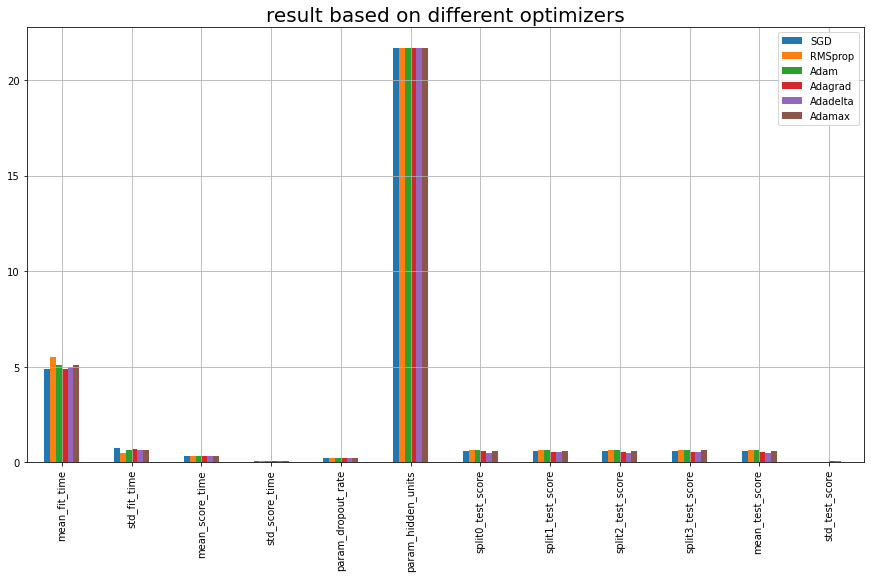

In [ ]:
def PlotGridSearch_optimizer(df):

  DataFrame=df
  df1= DataFrame[DataFrame.param_optimizer.str[:] == 'SGD'].mean()
  df2= DataFrame[DataFrame.param_optimizer.str[:] == 'RMSprop'].mean()
  df3= DataFrame[DataFrame.param_optimizer.str[:] == 'Adam'].mean()
  df4= DataFrame[DataFrame.param_optimizer.str[:] == 'Adagrad'].mean()
  df5= DataFrame[DataFrame.param_optimizer.str[:] == 'Adadelta'].mean()
  df6= DataFrame[DataFrame.param_optimizer.str[:] == 'Adamax'].mean()
  dfN = pd.concat([df1.T, df2.T,df3.T,df4.T,df5.T,df6.T], axis=1,ignore_index=False)
  #print(dfN.labels)
  dfN=dfN.drop(labels=['rank_test_score'], axis =0)
  print(dfN)
 
  dfN.plot.bar(figsize=(15,8))
  plt.legend(['SGD','RMSprop','Adam','Adagrad','Adadelta','Adamax'])
  plt.savefig("Allresults.png")
  plt.grid()
  plt.title('result based on different optimizers',fontsize=20)
  plt.show()
  
PlotGridSearch_optimizer(all_scores)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFr

                            0          1          2          3          4
mean_fit_time        5.056804   5.205585   5.097285   4.929057   5.074908
std_fit_time         0.688717   0.621573   0.618665   0.703747   0.616474
mean_score_time      0.347303   0.348530   0.353130   0.322165   0.353470
std_score_time       0.051253   0.056479   0.054783   0.040401   0.047910
param_dropout_rate   0.225000   0.225000   0.225000   0.225000   0.225000
param_hidden_units  21.666667  21.666667  21.666667  21.666667  21.666667
split0_test_score    0.698611   0.639028   0.536528   0.536250   0.590538
split1_test_score    0.675087   0.628594   0.497552   0.497083   0.589948
split2_test_score    0.683524   0.642465   0.528073   0.520000   0.595174
split3_test_score    0.689844   0.645955   0.559132   0.540556   0.600469
mean_test_score      0.686766   0.639010   0.530321   0.523472   0.594032
std_test_score       0.056517   0.049768   0.033183   0.032094   0.034086


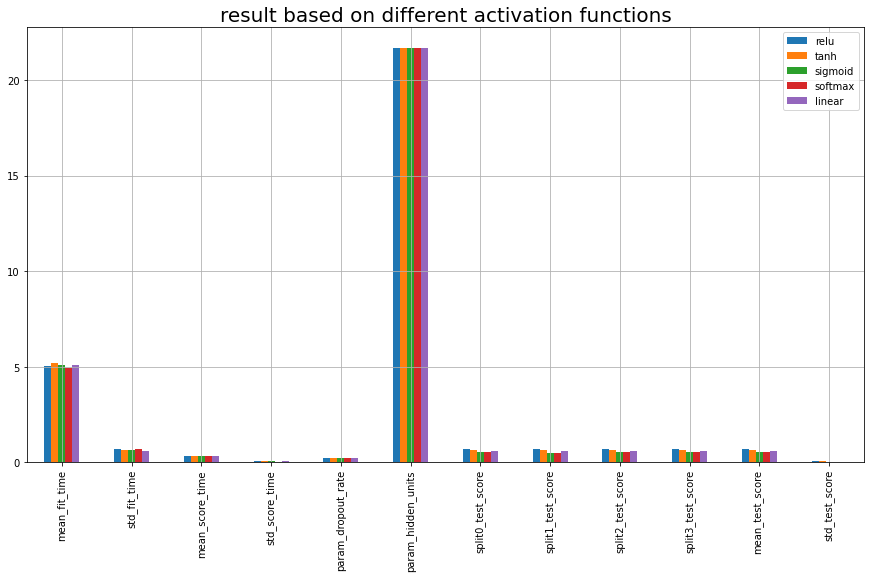

In [ ]:
def PlotGridSearch_optimizer(x):
 
  DataFrame=pd.DataFrame(x)
  df1= DataFrame[DataFrame.param_activation.str[:] == 'relu'].mean()
  df2= DataFrame[DataFrame.param_activation.str[:] == 'tanh'].mean()
  df3= DataFrame[DataFrame.param_activation.str[:] == 'sigmoid'].mean()
  df4= DataFrame[DataFrame.param_activation.str[:] == 'softmax'].mean()
  df5= DataFrame[DataFrame.param_activation.str[:] == 'linear'].mean()
  dfN = pd.concat([df1.T, df2.T,df3.T,df4.T,df5.T], axis=1,ignore_index=False)
  #print(dfN.labels)
  dfN=dfN.drop(labels=['rank_test_score'], axis =0)
  print(dfN)
 
  dfN.plot.bar(figsize=(15,8))
  plt.legend(['relu', 'tanh', 'sigmoid','softmax','linear'])
  plt.savefig("Allresults.png")
  plt.grid()
  plt.title('result based on different activation functions',fontsize=20)
  plt.show()
  
PlotGridSearch_optimizer(all_scores)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFr

                            0          1          2          3
mean_fit_time        4.943946   5.141995   5.061855   5.143116
std_fit_time         0.740051   0.625099   0.608323   0.625867
mean_score_time      0.342002   0.342339   0.349908   0.345430
std_score_time       0.052944   0.049282   0.049682   0.048753
param_dropout_rate   0.000000   0.100000   0.300000   0.500000
param_hidden_units  21.666667  21.666667  21.666667  21.666667
split0_test_score    0.597153   0.600444   0.606306   0.596861
split1_test_score    0.575042   0.582583   0.581194   0.571792
split2_test_score    0.600556   0.601667   0.590944   0.582222
split3_test_score    0.610653   0.616917   0.603722   0.597472
mean_test_score      0.595851   0.600403   0.595542   0.587087
std_test_score       0.042258   0.043016   0.040623   0.038621


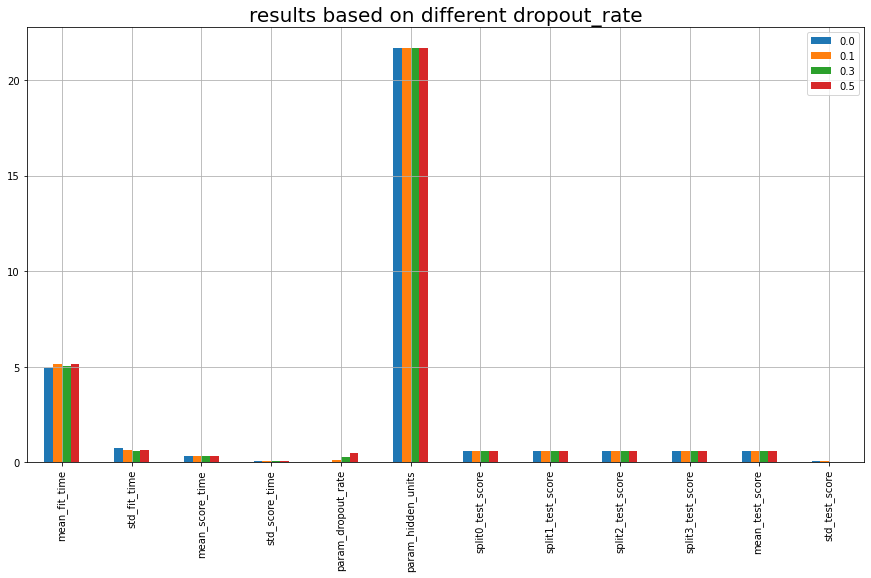

In [ ]:
def PlotGridSearch_optimizer(x):

  DataFrame=pd.DataFrame(x)
  df1= DataFrame[DataFrame.param_dropout_rate == 0.0].mean()
  df2= DataFrame[DataFrame.param_dropout_rate  == 0.1].mean()
  df3= DataFrame[DataFrame.param_dropout_rate  == 0.3].mean()
  df4= DataFrame[DataFrame.param_dropout_rate  == 0.5].mean()
  dfN = pd.concat([df1.T, df2.T,df3.T,df4.T], axis=1,ignore_index=False)
  #print(dfN.labels)
  dfN=dfN.drop(labels=['rank_test_score'], axis =0)
  print(dfN)
 
  dfN.plot.bar(figsize=(15,8))
  plt.legend([0.0, 0.1, 0.3, 0.5])
  plt.savefig("Allresults.png")
  plt.grid()
  plt.title('results based on different dropout_rate',fontsize=20)
  plt.show()
  
PlotGridSearch_optimizer(all_scores)

In [ ]:
# Training for best getting precision & recall rates

def train_best(x_train, y_train, x_valid, y_valid, L=2, nepoch=250, batch_size=500, loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']):

    print("Training set size:", len(x_train)," Validation set size:", len(x_valid))

    #Rescaling input data:
    def Rescale(x):
        #return (x-x.mean())/np.sqrt(x.var()) #another classic option for rescaling
        return x/np.max(x) #uniform rescaling
    x_train = Rescale(x_train)
    x_valid = Rescale(x_valid)

    #setting random seed for reproducibility:
    np.random.seed(12345)

    #creating the model:
    model = Sequential()
    model.add(Dense(L,input_shape=(L,),activation='relu'))
    model.add(Dense(25,activation='relu'))
    model.add(Dense(25,activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation='sigmoid'))
    
    #print(model.summary())

    model.compile(optimizer, loss, metrics)
    fit = model.fit(x_train, y_train, epochs = nepoch, batch_size = batch_size, validation_data = (x_valid,y_valid), verbose=2)
    return model,fit

current number of samples:  4000
Training set size: 3200  Validation set size: 800
Epoch 1/250
7/7 - 2s - loss: 0.6711 - accuracy: 0.5350 - val_loss: 0.6554 - val_accuracy: 0.5750 - 2s/epoch - 325ms/step
Epoch 2/250
7/7 - 0s - loss: 0.6619 - accuracy: 0.5375 - val_loss: 0.6447 - val_accuracy: 0.5750 - 176ms/epoch - 25ms/step
Epoch 3/250
7/7 - 0s - loss: 0.6533 - accuracy: 0.5372 - val_loss: 0.6351 - val_accuracy: 0.5750 - 159ms/epoch - 23ms/step
Epoch 4/250
7/7 - 0s - loss: 0.6461 - accuracy: 0.5372 - val_loss: 0.6263 - val_accuracy: 0.5750 - 93ms/epoch - 13ms/step
Epoch 5/250
7/7 - 0s - loss: 0.6390 - accuracy: 0.5406 - val_loss: 0.6183 - val_accuracy: 0.5900 - 113ms/epoch - 16ms/step
Epoch 6/250
7/7 - 0s - loss: 0.6317 - accuracy: 0.5644 - val_loss: 0.6108 - val_accuracy: 0.6050 - 96ms/epoch - 14ms/step
Epoch 7/250
7/7 - 0s - loss: 0.6243 - accuracy: 0.5828 - val_loss: 0.6034 - val_accuracy: 0.6187 - 115ms/epoch - 16ms/step
Epoch 8/250
7/7 - 0s - loss: 0.6174 - accuracy: 0.6122 - val

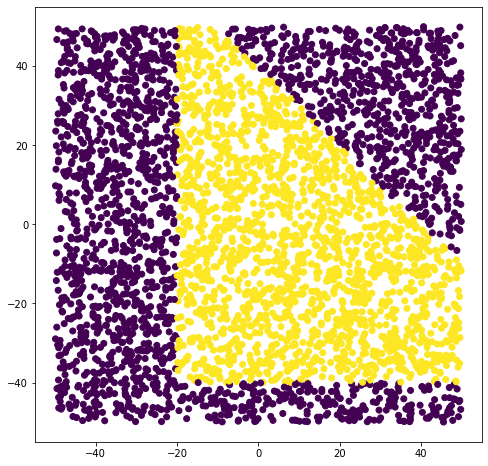

In [ ]:
change = 'default'
change_amount = 0

x,y,x_train_def, y_train_def, x_valid_def, y_valid_def  = generate_and_split_data(change,change_amount)


model_best,fit_best = train_best(x_train_def, y_train_def, x_valid_def, y_valid_def)

In [ ]:
pred = model_best.predict(x_valid_def)

In [ ]:
pred = pred.ravel()

In [ ]:
pred_l = []

for i in pred:
    i = float(i)
    pred_l.append(i)

In [ ]:
pred_i=[]

for i in pred_l:
    if( i !=0.0 ):
       pred_i.append(1)
    else:
       pred_i.append(0)
    

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_valid_def, pred_i)

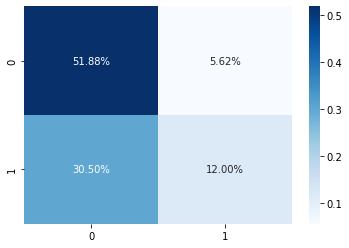

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

clf = confusion_matrix(y_valid_def, pred_i)
sns.heatmap(clf/np.sum(clf), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
from sklearn.metrics import classification_report

target_names = ['0', '1']
print(classification_report(y_valid_def, pred_i, target_names=target_names))

              precision    recall  f1-score   support

           0       0.63      0.90      0.74       460
           1       0.68      0.28      0.40       340

    accuracy                           0.64       800
   macro avg       0.66      0.59      0.57       800
weighted avg       0.65      0.64      0.60       800

